In [1]:
import pandas as pd
import gdown

from typing import List, Dict
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
google_path = "https://drive.google.com/uc?id="
file_id = "1tqZpPvvyluyu7VVvk99tKpJd4cIkS4yi"
output_name = "IMDB_Dataset.csv"
gdown.download(google_path + file_id, output_name, quiet=False, resume=True)

Downloading...
From: https://drive.google.com/uc?id=1tqZpPvvyluyu7VVvk99tKpJd4cIkS4yi
To: /Users/malikchettih/Projects/Emiasd-Projects/Emiasd-NLP/02.TP/IMDB_Dataset.csv
100%|██████████| 66.2M/66.2M [00:01<00:00, 43.8MB/s]


'IMDB_Dataset.csv'

# Introduction : Machine learning for NLP

🚧 **Question** 🚧

Why would one need NLP?

🚧 **Question** 🚧

Can you give two main domain of NLP applications?

### First application: text classification

- Goal of text classification: assign a label to a text.
- We actually want to model $p(y | x)$ where $x$ is the text and $y$ is the label.
- Let's call $\hat{p}$ our model. $\hat{p}$ is a function that takes a text as input and outputs a label.

🚧 **Question** 🚧

How would you model $\hat{p}$?


# From Raw data to dataset
First take a look at the data !

In [3]:
df = pd.read_csv(output_name, nrows=5000)
# Print some data. Make sure all text is printed with pandas, with word wrap
pd.set_option("display.max_colwidth", None)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

We need input and output: $X$ and $y$.  

In [4]:
X = df["review"]
y = (df["sentiment"] == "positive").astype(int)


## Split train and test (and validation)

🚧 **Question** 🚧

It is important to do it before the preprocessing. Why now ?

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [6]:
# Explore a couple of input texts
n = 2
selection = np.random.choice(len(X_train), n)
for i in selection:
    print(X_train[i] + "\n")

This movie starts off on the wrong foot and never really gets it going. The first scene shows a Life Flight helicopter landing and just outside the window you can distinctly see mountains in the background. For those of you who might not ever have been to Houston there is no elevation change. The city sits just above sea level and a 5 ft. incline is considered a big hill. To go along with that scenery, any shots outside of the hospital immediately tell the viewer that they are not in Houston. The trees are all missing leaves or are pine trees, neither of which Houston has very much of. Even the hospital itself, on the outside, is very unbelievable. Memorial Hermann Hospital is one of the top hospitals in the United States and sits smack dab in the middle of the Medical District just miles from downtown Houston, yet every outside shot of the hospital makes it appear that the hospital is out in the suburbs or even the countryside.<br /><br />It is obvious that whoever was in charge of th

🚧 **Question** 🚧

Is it what we want  ?

## Pre-processing and Tokenization

Tokenizing a text means splitting it into words.

This is not as easy as it seems. For instance, how would you tokenize the following text?

```
I'm a student. Are you a student? Alex's course has already started!
```
- We can naively split on spaces.
- We can use a library like `nltk`, that incorporates more rules to split the text (`spacy`, `beautiful soup`)
- We can include some *pre-processing*.
- Deal with encoding issues.

In [7]:
import unicodedata
import re


In [8]:
def preprocess_text(text: str) -> str:
    # lower case
    text = text.lower()
    # string normalization.
    text = unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode()

    # replace remove html stuffs.
    text = re.sub("<.*?>", " ", text)

    # remove non alpha numeric character, e.g punctuations !
    text = re.sub("[^a-z0-9]", " ", text)

    # replace numbers by the <NUM> token.
    text = re.sub(r"\d+", " ", text)

    # remove double whitespaces.
    text = re.sub(" +", " ", text.strip())
    return text

In [9]:
noisy_text = "Ï   lîved  in    San-Françisco...  ! for <bf>12 years</bf>."
preprocess_text(noisy_text)

'i lived in san francisco for years'

In [10]:
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

for i in selection:
    print(X_train[i] + "\n")

this movie starts off on the wrong foot and never really gets it going the first scene shows a life flight helicopter landing and just outside the window you can distinctly see mountains in the background for those of you who might not ever have been to houston there is no elevation change the city sits just above sea level and a ft incline is considered a big hill to go along with that scenery any shots outside of the hospital immediately tell the viewer that they are not in houston the trees are all missing leaves or are pine trees neither of which houston has very much of even the hospital itself on the outside is very unbelievable memorial hermann hospital is one of the top hospitals in the united states and sits smack dab in the middle of the medical district just miles from downtown houston yet every outside shot of the hospital makes it appear that the hospital is out in the suburbs or even the countryside it is obvious that whoever was in charge of the actual tropical storm par

**And the tokenizer ?**

🚧 **Question** 🚧

How to do a simple "White Space" tokenizer ?

In [11]:
# Try simple code
# Test it on sample sentences.

testsentence = "I'm a student. Are you a student? Alex's course has already started!"
preprocess_text(testsentence).split(" ")

['i',
 'm',
 'a',
 'student',
 'are',
 'you',
 'a',
 'student',
 'alex',
 's',
 'course',
 'has',
 'already',
 'started']

In a more useful way, a tokenizer should be able to:
- tokenize string
- build a vocabulary
- maybe keep track of word frequencies
- build a natural text from its tokenized version.
  

In [12]:
import nltk

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/malikchettih/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
from nltk import word_tokenize


class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their id.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of ties a word appears in the corpus.
        self.frequencies = {}

    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        return word_tokenize(text)

    def encode(self, text: str) -> List[int]:
        """Take a text as input and return its associated tokenization, as a list of ids."""
        list_tokens = self.split_text(text)
        list_ids = []
        for token in list_tokens:
            list_ids.append(self.vocab.get(token, -1))
        return list_ids

    def decode(self, ids: List[int]) -> str:
        tokens = [self.id_to_token[i] for i in ids]
        return " ".join(tokens)

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 0
        for text in corpus:
            list_tokens = self.split_text(text)
            for token in list_tokens:
                token_id = self.vocab.get(token, None)
                if token_id is None:
                    self.vocab[token] = current_id
                    self.id_to_token[current_id] = token
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1
        self.num_words = current_id
        self.vocab["<UNK>"] = -1
        self.id_to_token[-1] = "<UNK>"
        print(f"Built a vocabulary of {self.num_words} words.")

In [14]:
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(X_train)

Built a vocabulary of 32830 words.


In [15]:
tokenizer.vocab

{'i': 0,
 'mean': 1,
 'really': 2,
 'this': 3,
 'is': 4,
 'not': 5,
 'going': 6,
 'to': 7,
 'help': 8,
 'the': 9,
 'australian': 10,
 'film': 11,
 'industry': 12,
 'make': 13,
 'kind': 14,
 'of': 15,
 'with': 16,
 'no': 17,
 'values': 18,
 'any': 19,
 'okay': 20,
 'if': 21,
 'you': 22,
 're': 23,
 'a': 24,
 'stoner': 25,
 'and': 26,
 'have': 27,
 'nothing': 28,
 'better': 29,
 'do': 30,
 'then': 31,
 'maybe': 32,
 'think': 33,
 'makers': 34,
 'from': 35,
 'here': 36,
 'should': 37,
 'try': 38,
 'show': 39,
 'rest': 40,
 'world': 41,
 'what': 42,
 'great': 43,
 'talented': 44,
 'people': 45,
 'we': 46,
 'vehicle': 47,
 'for': 48,
 'it': 49,
 'come': 50,
 'on': 51,
 'now': 52,
 'just': 53,
 'tacky': 54,
 'll': 55,
 'give': 56,
 'writer': 57,
 'director': 58,
 'william': 59,
 'gove': 60,
 'credit': 61,
 'finding': 62,
 'someone': 63,
 'finance': 64,
 'ill': 65,
 'conceived': 66,
 'thriller': 67,
 'good': 68,
 'argument': 69,
 'wasting': 70,
 'money': 71,
 'subscribing': 72,
 'hbo': 73,
 '

In [16]:
tokenizer.frequencies[40]

234

In [17]:
X_train.shape

(3500,)

In [18]:
for i in selection:
    print(tokenizer.split_text(X_train[i]))

['this', 'movie', 'starts', 'off', 'on', 'the', 'wrong', 'foot', 'and', 'never', 'really', 'gets', 'it', 'going', 'the', 'first', 'scene', 'shows', 'a', 'life', 'flight', 'helicopter', 'landing', 'and', 'just', 'outside', 'the', 'window', 'you', 'can', 'distinctly', 'see', 'mountains', 'in', 'the', 'background', 'for', 'those', 'of', 'you', 'who', 'might', 'not', 'ever', 'have', 'been', 'to', 'houston', 'there', 'is', 'no', 'elevation', 'change', 'the', 'city', 'sits', 'just', 'above', 'sea', 'level', 'and', 'a', 'ft', 'incline', 'is', 'considered', 'a', 'big', 'hill', 'to', 'go', 'along', 'with', 'that', 'scenery', 'any', 'shots', 'outside', 'of', 'the', 'hospital', 'immediately', 'tell', 'the', 'viewer', 'that', 'they', 'are', 'not', 'in', 'houston', 'the', 'trees', 'are', 'all', 'missing', 'leaves', 'or', 'are', 'pine', 'trees', 'neither', 'of', 'which', 'houston', 'has', 'very', 'much', 'of', 'even', 'the', 'hospital', 'itself', 'on', 'the', 'outside', 'is', 'very', 'unbelievable',

## Basic Text classifiers

Now we have pre-processed and tokenized text ! Let's go for classification. To allow fair and easy comparison we start by a Base class.


In [19]:
class BaseTextClassifier:
    def predict(self, text: str) -> int:
        raise NotImplementedError()

    def predict_dataset(self, X: List[str]) -> List[int]:
        return [self.predict(x) for x in X]

    def evaluate(self, X: List[str], y: List[int]) -> Dict[str, float]:
        predictions = self.predict_dataset(X)
        y_array = np.array(y)
        accuracy = np.mean(predictions == y_array)
        return {"accuracy": accuracy}

🚧 **Question** 🚧
Propose a a very basic classifier.
- Gather counts of "positive" and "negative" words.
- But how do we know if a word is positive or negative ?
- We can look at words in the training set.


In [20]:
# Inherit from the Base class and implement a classifier based on counts


class CountBasedClassifier(BaseTextClassifier):
    def __init__(self, n_classes):
        self.n_classes = n_classes
        self.tokenizer = WhiteSpaceTokenizer()
        self.counts = {}

    def fit(self, X, y):
        self.tokenizer.fit(X)
        # X est le corpus : un ensemble de textes
        for i in range(len(X)):
            tokens = self.tokenizer.encode(X[i])
            # tokens la liste des mots (sous forme d'indices) dans le texte X[i]
            for iw in tokens:
                if iw == -1:
                    continue
                key = y[i], iw
                if key in self.counts.keys():
                    self.counts[key] += 1
                else:
                    self.counts[key] = 1

    def predict(self, text):
        wordidx = self.tokenizer.encode(text)
        # scores par classe pour le text
        scores = np.zeros(self.n_classes)
        for i in wordidx:
            if i == -1:
                continue
            for c in range(self.n_classes):
                key = c, i
                if key in self.counts.keys():
                    scores[c] += self.counts[c, i]
        return np.argmax(scores)

In [21]:
classif = CountBasedClassifier(2)
classif.fit(X_train, y_train)

Built a vocabulary of 32830 words.


In [22]:
classif.predict("very good")

np.int64(1)

In [23]:
print("Accuracy ")
classif.evaluate(X_test, y_test)

Accuracy 


{'accuracy': np.float64(0.6506666666666666)}

In [24]:
print("Equilibre entre classe:")
y_test.sum() / len(y_test)

Equilibre entre classe:


np.float64(0.49333333333333335)

## Do you know the Zipf Law ?

🚧 **Question** 🚧
The tokenizer contains the counts for every words in the training set. Plot the the word counts in descending order.
Comment the result.

In [25]:
wc = list(classif.tokenizer.frequencies.values())
wc.sort(reverse=True)

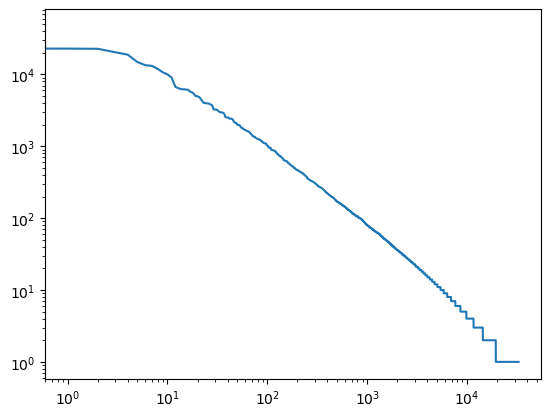

In [26]:
plt.loglog(wc)

In [31]:
# Inherit from the Base class and implement a classifier based on counts


class ProbaClassifier(BaseTextClassifier):
    def __init__(self, n_classes):
        self.n_classes = n_classes
        # This attribute is not used, but kept for API consistency
        self.tokenizer = WhiteSpaceTokenizer()

    def get_word_count(self, X, y):
        words_count = np.zeros((self.n_classes, self.tokenizer.num_words), dtype=int)
        for i in range(len(X)):
            tokens = self.tokenizer.encode(X[i])
            for w in tokens:
                if w != -1:
                    words_count[y[i], w] += 1
        frequencies = words_count / words_count.sum(axis=1, keepdims=True)
        return words_count, frequencies

    def fit(self, X, y):
        self.tokenizer.fit(X)
        word_count, frequencies = self.get_word_count(X, y)
        self.frequencies = frequencies
        self.words_count = word_count

    def predict(self, text: str) -> int:
        """
        Calculate a score for each label by summing
        the normalized frequencies of the words in 'text'.
        Then choose the label with the highest score.
        """
        global_count = self.words_count.sum(axis=0)
        global_freq = global_count / global_count.sum()
        words = self.tokenizer.encode(text)
        words = np.array([w for w in words if w != -1])
        words_count_per_class = self.frequencies[:, words] / global_freq[words]
        scores = words_count_per_class.sum(axis=1)
        return np.argmax(scores)

In [32]:
classifier = ProbaClassifier(2)
classifier.fit(X_train, y_train)
print(classifier.evaluate(X_test, y_test))

Built a vocabulary of 32830 words.
{'accuracy': np.float64(0.8193333333333334)}


In [33]:
print(classifier.words_count.sum(axis=0))

[11910   232  1623 ...     1     1     1]


In [34]:
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("wordnet")
stop = set(stopwords.words("french"))
print(stop)
len(stop)

{'eus', 'soient', 'aurait', 'ayons', 'aurais', 'aies', 'eu', 'ayant', 'à', 'fussent', 'mon', 'm', 'étaient', 'eûmes', 'mes', 'eût', 'en', 'ma', 'qui', 'l', 'sont', 'aurai', 'eue', 'ayante', 'une', 'seront', 'êtes', 'as', 'son', 'fussiez', 'la', 'étions', 'je', 'ayants', 'aurons', 'eurent', 'votre', 'ta', 'suis', 'ayantes', 'avait', 'de', 'eusse', 'étée', 'soyez', 'eusses', 'ses', 'ayez', 'y', 'elle', 'étant', 'aux', 'ils', 'seras', 'sera', 'étants', 'avez', 'auriez', 'es', 'aie', 'eut', 'avais', 'serions', 'tu', 'c', 'serons', 'vos', 'eues', 'ait', 'te', 'sois', 'aurions', 'serait', 'étées', 'ai', 'avec', 'ont', 'qu', 'eux', 'même', 'serez', 'avions', 'sommes', 'd', 'vous', 'fûmes', 'aviez', 'mais', 'nos', 'été', 'pour', 'notre', 'serais', 'eussent', 'dans', 'toi', 'et', 'tes', 'j', 'fusses', 'du', 'fut', 'ou', 'au', 'étantes', 'un', 'avons', 'eûtes', 'étiez', 'avaient', 'aient', 'fûtes', 'ce', 'il', 'sur', 'serai', 'ton', 'seriez', 'que', 'soyons', 'par', 'furent', 'lui', 'ne', 'ces',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malikchettih/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/malikchettih/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


157

In [35]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

lem = WordNetLemmatizer()
porter = PorterStemmer()
print(lem.lemmatize("flowers"))
print(porter.stem("flowers"))


flower
flower


## Do you know SciKit-Learn ?

🚧 **Question** 🚧

How can we optimize the algorithm?
- For the tokenization and/or vectorization ?
- For the classifier ? Write you count-based classifier that uses the vectorizer of SKLearn.
  

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Xvtrain = vectorizer.fit_transform(X_train).toarray()
Xvtest = vectorizer.transform(X_test).toarray()


In [38]:
Xvtrain.shape

(3500, 32807)

Now we have a "SKLearn" dataset,  we can also use all the classifiers we want from this library:
- Naive Bayes
- Logistic Regression
  

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
Xvtrain[0].shape

(32807,)

In [41]:
classif = LogisticRegression(max_iter=200, tol=1e-2)
classif.fit(Xvtrain, y_train)

LogisticRegression(max_iter=200, tol=0.01)

In [42]:
y_pred = classif.predict(Xvtest)
accuracy = np.mean(y_test == y_pred)
print(accuracy)

0.8726666666666667


$$P(y | x ) = \frac{1}{1+\exp({w^t x})}$$
avec :
- x : le vecteur qui contient les comptes de mots
- w : un vecteur de paramètre, de même taille que x
Si $x = ( x_i )$,  $x_i$ le compte du mot i, i étant l'indice dans le vocabulaire.
$$ w^t x = \sum_i w_i\times x_i $$

Formule de Bayes
$$P(y | x ) = \frac{P(x | y )P( y )}{P( x )}  = \frac{P(x , y )}{P( x )} $$


In [43]:
from sklearn.naive_bayes import MultinomialNB

classif = MultinomialNB()
classif.fit(Xvtrain, y_train)

y_pred = classif.predict(Xvtest)
accuracy = np.mean(y_test == y_pred)
print(accuracy)

0.8393333333333334


In [44]:
from sklearn.naive_bayes import BernoulliNB

classif = BernoulliNB()
classif.fit(Xvtrain, y_train)

y_pred = classif.predict(Xvtest)
accuracy = np.mean(y_test == y_pred)
print(accuracy)

0.848


In [45]:
y_pred = classif.predict(Xvtest)
accuracy = np.mean(y_test == y_pred)
print(accuracy)

0.848


# Vectorization and NLP

In Machine Learning for supervised classification, many approaches work with vectors. The input to be classified is represented by a vector which is given to the classifier. This input vector gathers a set of numerical features that describes the input. What kind of features can we extract from text ?  
The "easy features" are what we have done:
- Counting words (do we need all the words ?)
- Could we use binary features ?
- Counting n-grams (why ?)


🚧 **Question** 🚧

For instance, take what we did for the logistic regression and provide an interpretation of the model, its decision rule and the parameters ?


## Bag of words model

- We count the number of times each word appears in a text.
- We can then represent the text as a vector of counts.

## Frequency-based vectorization

- We can normalize the counts by the total number of words in the text.
- This gives us the frequency of each word in the text.
- This is called the **term frequency**.

## TF-IDF

- **Intuition**:
  - If a word appears many times in a document, it is important.
  - If a word appears in many documents, it is not very informative.
  - For instance, the words "the", "and" appears in many documents.

- **TF-IDF**:
  - We multiply the term frequency by the inverse document frequency.
  - Used a lot for information retrieval.


### Term Frequency (TF)
$$
\text{TF}(t, d) = \frac{f_{t, d}}{\sum_{t' \in d} f_{t', d}}
$$
Where:
- $ f_{t, d} $: Frequency of term $ t $ in document $ d $.
- $ \sum_{t' \in d} f_{t', d} $: Total number of terms in document $ d $.

---

### Inverse Document Frequency (IDF)
$$
\text{IDF}(t) = \log\left(\frac{N + 1}{\text{DF}(t) + 1}\right) + 1
$$
Where:
- $ N $: Total number of documents.
- $ \text{DF}(t) $: Number of documents containing the term $ t $.
- Adding $ +1 $ in numerator and denominator prevents division by zero.

---

### TF-IDF
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$


🚧 **Question** 🚧

Write a function that computes the TF-IDF matrix from a word count matrix  

In [41]:
def word_count_to_tfidf(word_count_matrix):
    # <-- TODO
    # Term Frequency (TF)
    term_frequencies = word_count_matrix / word_count_matrix.sum(axis=1, keepdims=True)

    # Document Frequency (DF)
    document_frequencies = np.count_nonzero(word_count_matrix > 0, axis=0)

    # Inverse Document Frequency (IDF)
    num_documents = word_count_matrix.shape[0]
    idf = np.log((num_documents + 1) / (document_frequencies + 1)) + 1

    # TF-IDF
    tfidf_matrix = term_frequencies * idf
    return tfidf_matrix

In [42]:
Xvtrain.shape

(3500, 32807)

## Application: identifying similar documents

- We can use TF-IDF to identify similar documents.
- To quickly compare two documents, we can compute the cosine similarity between their TF-IDF vectors.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X.apply(preprocess_text))

query = "boats planes and cars"


🚧 **Question** 🚧

Find the most similar text in $X$ ?

In [44]:
qv = vectorizer.transform(["rabbits"])
similarities = X_vec.dot(qv.T)

similarities

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (5000, 1)>

In [45]:



# print(similarities.shape)
bestmatch = np.argsort(similarities.toarray()[:, 0])
print(X[bestmatch[-3]])

The folks at Aardman have done a cool, cute and wild adaptation of their short films of Wallace and Gromit to feature length, as the man and his dog, inventors who seem to have more of the intelligence (or practicality) for the latter. In this case they've invented a machine that can capture all of the bunnies that are eating up the crops all over a quiet English village. In particular for Mrs. Tottington (or 'Totty' for those who are 'intimate'), much to the chagrin of Victor Quartermaine, who just wants to kill all the rabbits with his trust rifle. Wallace and Gromit seem to have success with their machine, but Wallace has a mix-up: a machine he's made to make more food suddenly criss-crosses himself with a rabbit - the curse is on! <br /><br />A lot of this is about as much light-hearted fun that a kid's movie could ask for, but it also tips its hat to the oldest tradition in classic cartoon slapstick: Looney Tunes, which in turn is indebted to much silent comedy and vaudeville. Gra

In [46]:
print(X[bestmatch])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Limitations of frequency-based vectorization

- Each word is treated independently, regardless of its context.
- The order of words is not taken into account.
- Semantic information is not captured.
- And other ideas of limitations ?

# Word embeddings

**A Intuitive example**: Suppose we are interested in classifying texts in 4 categories: "World", "Sports", "Business", "Sci/Tech".

## Word embeddings
- We could manually design a vector for each word.
- For instance, over the dimensions [World, Sports, Business, Sci/Tech]:
  - "Football" could be [0, 0.2, 0.8, 0]
  - "Microsoft" could be [0, 0, 0.5, 0.5]
  - "Olympics" could be [0.25, 0.75, 0, 0]
- But doing this naively would be very inefficient.
  - Hard to design the vectors.
  - Hard to compute them
  - Does not account for the context of the words.

## Learning word embeddings

- Instead, we can learn those embeddings from the data!
- Same idea than with neural networks: we learn the weights of the embeddings from the data.

**In practice**
- Set a dimension $d$ for the embeddings (e.g. 100).
- For each word, initialize a random vector of size $d$.
- Train a model to predict something from the embeddings.




🚧 **Question** 🚧

Add the necessary code in the following class.


In [46]:
from torch import nn
import torch
import torch.nn as nn

emb = nn.Embedding(32000, 3)  # Création d'un module, avec initialisation aléatoire
txts = [[1, 0, 6, 18, 1],]
txts = torch.LongTensor(txts)
print(txts)
emb(txts)

tensor([[ 1,  0,  6, 18,  1]])


tensor([[[-0.0617,  0.5320, -1.6179],
         [ 1.8863,  0.3235,  0.6280],
         [-1.4974, -1.4953,  0.7640],
         [-1.6527,  0.7259,  0.8158],
         [-0.0617,  0.5320, -1.6179]]], grad_fn=<EmbeddingBackward0>)

In [47]:
class WordEmbeddingClassifier(BaseTextClassifier):
    def __init__(self, n_classes, voc_size, d_embed, tokenizer, lr=1e-3, n_epochs=10):
        self.tokenizer = tokenizer
        self.voc_size = voc_size
        self.lr = lr
        self.d_embed = d_embed
        self.n_epochs = n_epochs
        self.n_classes = n_classes

        self.embedding = nn.Embedding(voc_size, d_embed)
        self.fc = nn.Linear(d_embed, n_classes)  # Output layer for classification

    def fit(self, X, y):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(
            list(self.embedding.parameters()) + list(self.fc.parameters()), lr=self.lr
        )

        # Tokenize and convert to tensors
        X = [self.tokenizer.encode(text) for text in X]
        X = [torch.tensor(tokens) for tokens in X]  # Convert to tensors
        # X.shape = (n_texts, n_tokens, 100)
        y = torch.tensor(y, dtype=torch.long)  # Convert labels to tensor

        # Training loop
        for epoch in tqdm(range(self.n_epochs)):
            epoch_loss = 0.0
            optimizer.zero_grad()

            for i, tokens in enumerate(X):

                # Get embeddings and mean pooling
                embedded = self.embedding(tokens)  # Shape: (n_tokens, d_embed)
                pooled = embedded.mean(dim=0)  # Shape: (d_embed,)

                # Pass through classification layer
                logits = self.fc(pooled.reshape(1, -1))  # Shape: (1, num_classes)

                # Compute loss and backpropagate
                loss = criterion(logits, y[i].unsqueeze(0))  # Shape: (1,)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                epoch_loss += loss.item()

            print(f"Epoch {epoch+1}/{self.n_epochs}, Loss: {epoch_loss/len(X):.4f}")

    def predict(self, text: str) -> int:
        tokens = self.tokenizer.encode(text)
        tokens = torch.tensor([t for t in tokens if t != -1])  # Ignore invalid tokens

        with torch.no_grad():
            embedded = self.embedding(tokens)  # Shape: (seq_len, d_embed)
            pooled = embedded.mean(dim=0)  # Shape: (d_embed,)
            logits = self.fc(pooled.unsqueeze(0))  # Shape: (1, num_classes)
            predicted_class = logits.argmax(dim=1).item()  # Get class index

        return predicted_class

In [48]:
classifier = WordEmbeddingClassifier(
    voc_size=tokenizer.num_words,
    n_classes=2,
    d_embed=10,
    tokenizer=tokenizer,
    lr=0.01,
    n_epochs=10
)

classifier.fit(X_train.tolist(), y_train)

print(classifier.evaluate(X_test, y_test))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.4524
Epoch 2/10, Loss: 0.1217
Epoch 3/10, Loss: 0.0199
Epoch 4/10, Loss: 0.0024
Epoch 5/10, Loss: 0.0003
Epoch 6/10, Loss: 0.0000
Epoch 7/10, Loss: 0.0000
Epoch 8/10, Loss: 0.0000
Epoch 9/10, Loss: 0.0000
Epoch 10/10, Loss: 0.0000
{'accuracy': np.float64(0.878)}


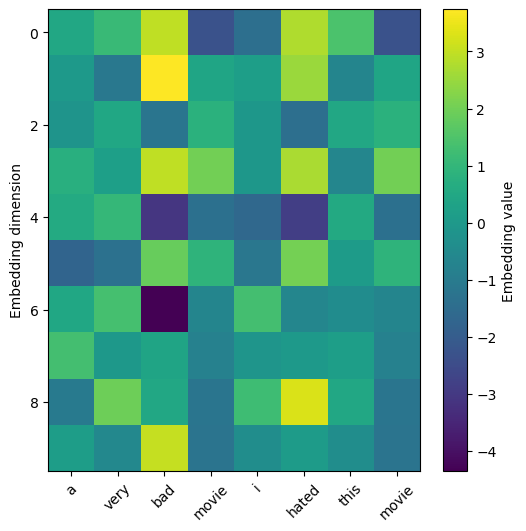

In [50]:
# Plot the embedding matrix of a review

text = "a very bad movie i hated this movie."
tokens = tokenizer.encode(text)
tokens = torch.tensor([t for t in tokens if t != -1])  # Ignore invalid tokens

with torch.no_grad():
    embedded = classifier.embedding(tokens)  # Shape: (seq_len, d_embed)

plt.figure(figsize=(6, 6))
plt.imshow(embedded.T, cmap="viridis", aspect="auto")
plt.xticks(
    range(len(tokens)), [tokenizer.id_to_token[t.item()] for t in tokens], rotation=45
)
plt.ylabel("Embedding dimension")

plt.colorbar(label="Embedding value")

## Word embeddings in practice

- Word embeddings can be very powerful but costly to learn.
- An innovative idea was to pre-train word embeddings on a large corpus.
- This is the idea from the paper "Distributed Representations of Words and Phrases and their Compositionality" by Mikolov et al. (2013), which introduced the Word2Vec model.
-
### Word2Vec
- Word2Vec is a contrastive learning model.
- Key Idea: Words with similar contexts (neighboring words) have similar vector representations.


## Word2Vec: Key Ideas with Math

1. **Select a Word and Context**  
   - Randomly sample a word $w$ from a document.  
   - Define its **positive context** as the words within a window of size $R$ around $w$, excluding $w$ itself:  
     $$
     \mathcal{C}_{\text{pos}} = [w_{i-R}, \dots, w_{i-1}, w_{i+1}, \dots, w_{i+R}].
     $$

2. **Negative Examples**  
   - To balance the training, introduce **negative examples** by sampling $2KR$ random words from the vocabulary $\mathcal{V}$:  
     $$
     \mathcal{C}_{\text{neg}} = \{c_1, \dots, c_{2KR}\}, \quad c_j \in \mathcal{V}.
     $$

3. **Embedding Words**  
   - Represent the target word $w$ as a vector $\mathbf{v}_w \in \mathbb{R}^d$ using an embeddings table $\mathcal{E}_w$.  
   - Similarly, map each word in $\mathcal{C}_{\text{pos}}$ and $\mathcal{C}_{\text{neg}}$ to vectors:  
     $$
     \mathbf{v}_{\mathcal{C}_{\text{pos}}} \in \mathbb{R}^{2R \times d}, \quad \mathbf{v}_{\mathcal{C}_{\text{neg}}} \in \mathbb{R}^{2KR \times d}.
     $$

4. **Compute Similarity**  
   - For each context word $c$ in $\mathcal{C}_{\text{pos}} \cup \mathcal{C}_{\text{neg}}$, compute the similarity with $w$ using the dot product:  
     $$
     s = \mathbf{v}_c \cdot \mathbf{v}_w.
     $$  
   - Train the model to maximize the similarity between $w$ and the positive context words, and minimize the similarity with the negative context words.
